In [1]:
# Импортирование необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go


In [2]:
# Загрузка датасета
data = pd.read_csv('C:\\Users\\haida\\OneDrive\\Рабочий стол\\Study\\Диплом\\sp500.csv')
data


,Date,ABNB,MDLZ,CI,ANET,KLAC,PANW,PLD,ADP,MMC,...,MAS,NDSN,ENPH,WBA,BBY,GEN,DGX,MAA,ZBRA,PKG
0,2023-06-01,112.160004,71.910957,248.869064,166.679993,448.153168,216.789993,119.265953,207.079636,171.913635,...,48.184620,219.409195,181.470001,28.373558,69.389374,17.147909,131.144730,140.906418,266.200012,120.875099
1,2023-06-02,118.059998,72.555717,252.444122,162.500000,453.629669,217.240005,121.483223,211.684448,173.865143,...,50.551624,224.801163,181.860001,29.187704,69.684448,17.577827,132.622009,144.493347,278.010010,124.022133
2,2023-06-05,115.690002,72.575256,258.052216,162.630005,453.619751,226.789993,121.201202,211.410690,174.614227,...,49.981968,222.159607,182.729996,29.243853,69.322754,17.558285,131.311050,144.186447,269.109985,123.121597
3,2023-06-06,117.300003,71.588570,259.719910,159.679993,456.541229,224.720001,122.368187,211.899536,173.924316,...,52.103428,222.862015,182.610001,29.505878,70.769547,17.714619,130.264252,144.915359,270.100006,125.464943
4,2023-06-07,116.550003,70.523727,258.328522,155.589996,459.274536,216.250000,124.536827,211.635559,172.376862,...,53.871307,230.806564,182.089996,29.880201,72.035500,17.362867,131.976334,148.607758,277.559998,128.641006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2024-05-24,144.470001,68.300003,332.609985,306.549988,779.059998,321.600006,104.750000,248.899994,207.889999,...,69.099998,237.940002,125.180000,16.030001,71.500000,24.889999,141.279999,133.199997,327.000000,183.770004
248,2024-05-28,147.009995,67.570000,333.209991,307.489990,786.140015,308.010010,105.000000,243.300003,203.970001,...,67.480003,233.580002,129.380005,15.380000,72.550003,24.809999,138.910004,130.309998,326.239990,180.919998
249,2024-05-29,146.610001,66.930000,332.920013,308.309998,772.359985,306.899994,105.000000,240.089996,201.960007,...,67.330002,230.000000,125.690002,14.890000,71.900002,24.500000,138.190002,128.779999,316.929993,179.160004
250,2024-05-30,145.520004,67.889999,331.000000,303.660004,770.130005,293.179993,107.570000,240.910004,204.399994,...,68.379997,231.300003,130.660004,15.390000,81.550003,24.580000,139.330002,129.860001,316.619995,181.479996


In [3]:
start_date = '2023-06-01'
end_date = '2024-05-31'
df1=pd.DataFrame()
df2=pd.DataFrame()
all_dates = pd.date_range(start=start_date, end=end_date)
df2['Date']= pd.to_datetime(all_dates)
df1['Date']=pd.to_datetime(data['Date'])
df1['Акции']=data.iloc[:,1:].sum(axis=1)
#df1=df1[:-60]
df = pd.merge(df2, df1, on='Date', how='left')
df['Date']=pd.to_datetime(df['Date'])
df['Акции'] = df['Акции'].fillna(method='ffill')
df

,Date,Акции
0,2023-06-01,85267.065580
1,2023-06-02,86785.947122
2,2023-06-03,86785.947122
3,2023-06-04,86785.947122
4,2023-06-05,86581.068192
...,...,...
361,2024-05-27,108157.736556
362,2024-05-28,107481.700608
363,2024-05-29,106191.713351
364,2024-05-30,106251.016585


In [4]:
# инициализируем plotly
init_notebook_mode(connected = True)

# опишем функцию, которая будет визуализировать все колонки dataframe в виде line plot
def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        if (column!= "Date"):
            trace = go.Scatter(
                x = df['Date'],
                y = df[column],
                mode = 'lines',
                name = column

            )
            data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

    
plotly_df(df, title = 'Показание акций')

In [5]:
predictions = 30

# приводим dataframe к нужному формату
df.columns = ['ds', 'y']

# отрезаем из обучающей выборки последние 30 точек, чтобы измерить на них качество
train_df = df[:-predictions]
train_df['cap']=111000
train_df['floor']=83000
train_df

C:\Users\haida\AppData\Local\Temp/ipykernel_10992/2550605566.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haida\AppData\Local\Temp/ipykernel_10992/2550605566.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y,cap,floor
0,2023-06-01,85267.065580,111000,83000
1,2023-06-02,86785.947122,111000,83000
2,2023-06-03,86785.947122,111000,83000
3,2023-06-04,86785.947122,111000,83000
4,2023-06-05,86581.068192,111000,83000
...,...,...,...,...
331,2024-04-27,105435.500755,111000,83000
332,2024-04-28,105435.500755,111000,83000
333,2024-04-29,105919.921941,111000,83000
334,2024-04-30,104364.660661,111000,83000


In [6]:
start_date = '2023-06-01'
end_date = '2024-05-31'
# Генерируем все даты в указанном диапазоне
all_dates = pd.date_range(start=start_date, end=end_date)

# Фильтруем только субботы (5) и воскресенья (6)
weekends = all_dates[all_dates.weekday.isin([5, 6])]

# Создаем DataFrame с праздничными днями
holidays = pd.DataFrame({
    'holiday': 'weekend',
    'ds': weekends,
    'lower_window': 0,
    'upper_window': 1,
})
holidays

,holiday,ds,lower_window,upper_window
0,weekend,2023-06-03,0,1
1,weekend,2023-06-04,0,1
2,weekend,2023-06-10,0,1
3,weekend,2023-06-11,0,1
4,weekend,2023-06-17,0,1
...,...,...,...,...
99,weekend,2024-05-12,0,1
100,weekend,2024-05-18,0,1
101,weekend,2024-05-19,0,1
102,weekend,2024-05-25,0,1


In [7]:

m = Prophet(growth='logistic',holidays=holidays,changepoint_prior_scale=0.011)
m.add_country_holidays(country_name='US')
m.fit(train_df)



06:09:00 - cmdstanpy - INFO - Chain [1] start processing
06:09:00 - cmdstanpy - INFO - Chain [1] done processing


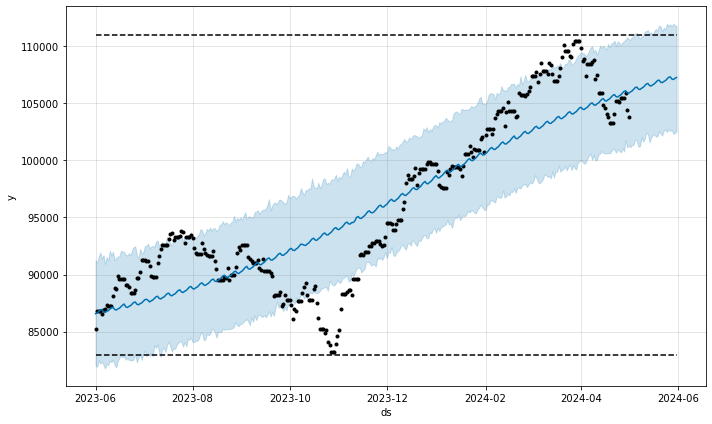

In [8]:
from prophet.plot import add_changepoints_to_plot
future = m.make_future_dataframe(periods=predictions)
future['cap']=111000
future['floor']=83000
forecast = m.predict(future)

fig = m.plot(forecast)


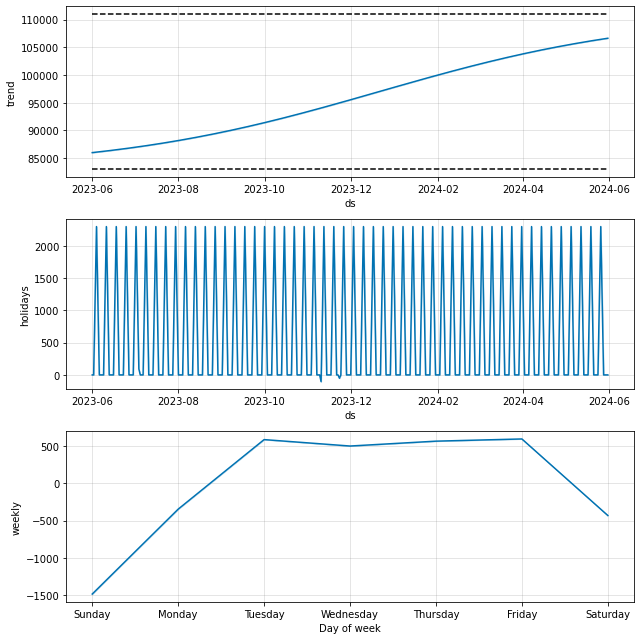

In [9]:
fig = m.plot_components(forecast)

In [10]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))
cmp_df

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2023-06-01,86573.637655,82025.069602,91262.719254,85267.065580
2023-06-02,86631.400124,81921.370417,91046.225680,86785.947122
2023-06-03,86765.715703,82514.621868,91582.650804,86785.947122
2023-06-04,86897.717981,82205.915146,91935.693521,86785.947122
2023-06-05,86932.896054,82396.512307,91402.855002,86581.068192
...,...,...,...,...
2024-05-27,107310.846021,102568.175134,111903.703448,108157.736556
2024-05-28,107125.775649,102666.164104,111743.161564,107481.700608
2024-05-29,107078.322212,102311.674677,111956.167776,106191.713351


In [11]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
df_cv = cross_validation(m, initial='300 days', period='15 days', horizon = '30 days')
df_p = performance_metrics(df_cv)
df_p

  0%|          | 0/1 [00:00<?, ?it/s]

06:34:15 - cmdstanpy - INFO - Chain [1] start processing
06:34:15 - cmdstanpy - INFO - Chain [1] done processing


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,8.693123e+05,932.369207,597.390057,0.005555,0.001460,0.005517,1.000000
1,4 days,1.030252e+06,1015.013384,782.081810,0.007258,0.006571,0.007214,1.000000
2,5 days,1.218306e+06,1103.769198,1023.731027,0.009487,0.006930,0.009435,1.000000
3,6 days,5.569119e+05,746.265277,745.845619,0.006877,0.006930,0.006853,1.000000
4,7 days,6.398647e+05,799.915411,798.257560,0.007356,0.007129,0.007329,1.000000
5,8 days,6.125601e+05,782.662170,779.381657,0.007175,0.007129,0.007150,1.000000
6,9 days,2.379003e+06,1542.401822,1331.113070,0.012353,0.008010,0.012251,1.000000
7,10 days,3.797432e+06,1948.700147,1787.382569,0.016629,0.020836,0.016466,1.000000
8,11 days,8.762818e+06,2960.205700,2862.939050,0.026843,0.022663,0.026462,0.666667
9,12 days,1.200958e+07,3465.483416,3371.608801,0.031735,0.037029,0.031211,0.333333


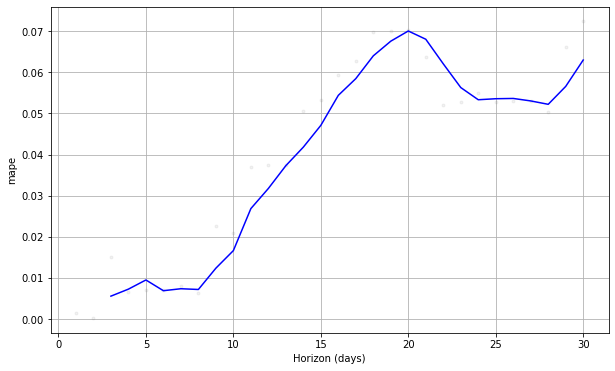

In [12]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [13]:
import numpy as np
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print ('MAPE', np.mean(abs(cmp_df[-predictions:]['p'])))
print ('MAE', np.mean(abs(cmp_df[-predictions:]['e'])))

MAPE 1.2033418552866333
MAE 1300.9689080004225


In [ ]:
cmp_df1=cmp_df.tail(30)
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100*cmp_df['e']/cmp_df['y']
print ('MAPE', np.mean(abs(cmp_df[-predictions:]['p'])))
print ('MAE', np.mean(abs(cmp_df[-predictions:]['e'])))

In [112]:
def show_forecast(cmp_df, num_predictions, num_values):
    # верхняя граница доверительного интервала прогноза
    upper_bound = go.Scatter(
        name='Upper Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions)['yhat_upper'],
        mode='lines',
        marker=dict(color="#444444"),
        line=dict(width=0),
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty')

    # прогноз
    forecast = go.Scatter(
        name='Prediction',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions)['yhat'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )

    # нижняя граница доверительного интервала
    lower_bound = go.Scatter(
        name='Lower Bound',
        x=cmp_df.tail(num_predictions).index,
        y=cmp_df.tail(num_predictions)['yhat_lower'],
        marker=dict(color="#447777"),
        line=dict(width=0),
        mode='lines')

    # фактические значения
    fact = go.Scatter(
        name='Fact',
        x=cmp_df.tail(num_values).index,
        y=cmp_df.tail(num_values)['y'],
        marker=dict(color="red"),
        mode='lines',
    )

    # последовательность рядов в данном случае важна из-за применения заливки
    data = [lower_bound, upper_bound, forecast, fact]

    layout = go.Layout(
        yaxis=dict(title='Цена', gridcolor='rgba(200, 200, 200, 0.5)'),
        xaxis=dict(title='Дата', gridcolor='rgba(200, 200, 200, 0.5)'),
        title='Прогноз цены акций',
        showlegend=True,
        legend=dict(x=0, y=1, bgcolor='rgba(255, 255, 255, 0.5)'),
        plot_bgcolor='rgba(240, 240, 240, 0.9)'
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, show_link=False)

# Пример использования функции
# предположим, что cmp_df - DataFrame с необходимыми столбцами, а predictions - количество предсказаний
predictions = 30 
# Замените это на нужное значение
show_forecast(cmp_df, num_predictions=predictions, num_values=200)
